## **판다스(pandas)**

* https://pandas.pydata.org/
* `pandas` 라이브러리는 사용하기 쉬운 고성능 데이터 구조와 데이터 분석 도구를 제공합니다. 
* 대표적인 데이터 구조는 `Series`와 `DataFrame`입니다. 
> * Series와 DataFrame을 각각 1D 배열/ 2D 테이블로 생각할 수 있습니다.
> * 열 이름과 행 레이블이 있는 엑셀 시트와 비슷합니다.
* 엑셀에 있는 많은 기능을 프로그램에서 사용할 수 있습니다. 
> * 피봇 테이블이나 다른 열을 기반으로 열을 계산하고 그래프 출력하는 기능 등이 포함됩니다. 
> * 행/열 값을 기준으로 그룹핑할 수도 있습니다. 
* 판다스는 SQL과 비슷하게 테이블을 조인할 수 있습니다. 
* 판다스는 시계열 데이터를 다루는 것도 가능합니다. 

`필요 라이브러리`

* 넘파이(NumPy)

# 0. 설치

In [ ]:
pip install pandas

# 1. 설정

* `pandas`를 임포트합니다. 보통 `pd`로 임포트합니다:

In [ ]:
import pandas as pd

# 2. `Series` 객체

`pandas` 라이브러리는 다음과 같은 유용한 데이터 구조를 포함하고 있습니다:

* `Series` 객체는 1D 배열입니다. (열 이름과 행 레이블을 가진) 엑셀 시트의 열과 비슷합니다.
* `DataFrame` 객체는 2D 테이블입니다. (열 이름과 행 레이블을 가진) 엑셀 시트와 비슷합니다.

## 2.1. `Series` 만들기

In [ ]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

* 넘파이는 행렬이나 일반적으로 다차원 배열을 쉽게 처리할 수 있도록 지원하는 파이썬의 라이브러리이다. 
* 넘파이는 데이터 구조 외에도 수치 계산을 위해 다양한 함수를 제공
* Series를 넘파이 함수의 매개변수로 전달할 수 있습니다.

In [ ]:
import numpy as np
np.exp(s)

0    1.618178e+03
1    1.444668e+00
2    5.284913e+08
3    2.851124e+64
dtype: float64

* `Series` 객체에 대한 산술 연산도 가능합니다. 
* 산술연산이 원소별로 적용됩니다:

In [ ]:
s + [1000,2000,3000,4000]

0     7
1     4
2     8
3    10
dtype: int64

* `Series`에 하나의 숫자를 더하면 `Series`에 있는 모든 원소에 더해집니다. 

In [ ]:
s + 1000

0    1007.389056
1    1000.367879
2    1020.085537
3    1148.413159
dtype: float64

### `[질문1] 왜 연산값이 위와 같이 나오는가` 정답은 np.exp(s) + 1000 아닌가?

* `*`나 `/` 같은 모든 이항 연산과 심지어 조건 연산에서도 마찬가지입니다:
* 등호 / 부등호는 True / False의 결과로 나타남

In [ ]:
 s

0    2
1   -1
2    3
3    5
dtype: int64

In [ ]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## 2.2. 인덱스 레이블

* `Series` 객체에 있는 각 원소는 *인덱스 레이블*(index label)이라 불리는 고유한 식별자를 가지고 있습니다. 
* 기본적으로 `Series`에 있는 원소의 순서입니다(`0`에서 시작합니다). 
* 하지만 수동으로 인덱스 레이블을 지정할 수도 있습니다:

In [ ]:
s1 = pd.Series([68, 83, 112, 68])
s1

0     68
1     83
2    112
3     68
dtype: int64

In [ ]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

* index label를 활용하여 `Series`를 호출할 수 있습니다. 

In [ ]:
s2["bob"]

83

* 일반 배열처럼 정수 인덱스를 사용하여 계속 원소에 접근할 수 있습니다.

In [ ]:
s2[1]

83

* 레이블이나 정수를 사용해 접근할 때 명확하게 하기 위해 
> 레이블은 `loc` 속성을 사용하고 정수는 `iloc` 속성을 사용하는 것이 좋습니다.

In [ ]:
s2.loc["bob"]

83

In [ ]:
s2.iloc[1]

83

* `Series`는 인덱스 레이블을 슬라이싱할 수도 있습니다.

In [ ]:
s2.iloc[0:]

alice       68
bob         83
charles    112
darwin      68
dtype: int64

### `[질문2] 왜 alice가 처음에 안 나오는가?`

* 기본 정수 레이블을 사용할 때 예상 외의 결과를 만들 수 있기 때문에 주의해야 합니다.

In [ ]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [ ]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

* 위의 예제에서 값 뿐만아니라 인덱스 정보도 함께 전달됩니다. 
* 첫 번째 원소의 인덱스 레이블이 `2`입니다. 따라서 슬라이싱 결과에서 인덱스 레이블 `0`인 원소는 없습니다.

In [ ]:
try:
    surprise_slice[0]
except KeyError as e:

    print("키 에러:", e)

### `[질문3] `surprise_slice[0]`의 의미가 첫번째 값을 호출하는 지, 인덱스가 0인 값을 호출하는가`

* `iloc` 속성을 사용해 정수 인덱스로 원소에 접근할 수 있습니다. 
* `Series` 객체를 사용할 때 `loc`와 `iloc`를 사용하는 것이 필요한 이유입니다.
* `loc`와 `iloc`의 의미를 정확히 이해해야 합니다. 

In [ ]:
surprise_slice[0]

1002

In [ ]:
surprise_slice.iloc[0]

1002

In [ ]:
surprise_slice.loc[2]

1002

## 2.3. `dict`로부터 `Series` 초기화

* 파이썬에서는 기본적으로 key와 value로 구성된 Dictionary(dict)라는 데이터 타입이 존재합니다. 
* dict 생성방법은 {key : value} 로 생성합니다. 
* `dict`로부터 `Series` 객체를 만들 수 있습니다. 
* 키는 인덱스 레이블로 사용됩니다.

In [ ]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

* `Series`에 포함할 원소를 제어하고 `index`를 지정하여 명시적으로 순서를 결정할 수 있습니다:

In [ ]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## 2.4. 자동 정렬

* 여러 개의 `Series` 객체를 다룰 때 `pandas`는 자동으로 인덱스 레이블에 따라 원소를 정렬합니다.
* 생성된 `Series` s2 + s3는 `s2`와 `s3`의 동일 인덱스 레이블에 해당하는 값의 합을 나타냅니다. 
* `s2`에 `"colin"`이 없고 `s3`에 `"charles"`가 없기 때문에 이 원소는 `NaN` 값을 가집니다. (Not-a-Number는 *누락*이란 의미입니다).

In [ ]:
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [ ]:
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [ ]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

In [ ]:
s5 = pd.Series([1000,1000,1000,1000])

0    1000
1    1000
2    1000
3    1000
dtype: int64

* 레이블이 일치해야 연산이 되고, 그렇지 않다면, 연산을 수행할 수 없습니다. 따라서 모두 `NaN`이 됩니다. 

In [ ]:
s5 = pd.Series([1000,1000,1000,1000])
print(s2.keys())
print("s2 =", s2.values)

print(s5.keys())
print("s5 =", s5.values)

s2 + s5

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
s2 = [ 68  83 112  68]
RangeIndex(start=0, stop=4, step=1)
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

## 2.5. 스칼라로 초기화

* 스칼라와 인덱스 레이블의 리스트로 `Series` 객체를 초기화할 수도 있습니다.
* 다만, 모든 원소가 스칼라 값으로 설정됩니다.

In [ ]:
meaning = pd.Series([])

<ipython-input-53-3143fde9b887>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  meaning = pd.Series([])


In [ ]:
meaning = pd.Series(100, ["life", "universe", "everything"])
meaning

life          100
universe      100
everything    100
dtype: int64

## 2.6. `Series` 이름

* `Series`는 `name`을 가질 수 있습니다:

In [ ]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## 2.7. `Series` 그래프 출력

* matplotlib을 사용해 `Series` 데이터를 쉽게 그래프로 출력할 수 있습니다

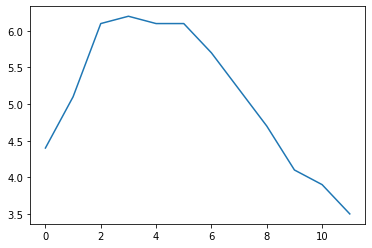

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9, 3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

# 3. `DataFrame` 객체

* 데이터프레임 객체는 엑셀과 같은 스프레드시트를 표현합니다. 
* 행 인덱스, 열 이름, 셀 값을 가집니다. 
* 데이터프레임 객체를 통해서
> * 다른 열과의 계산을 할 수 있고, 
> * 피봇 테이블을 만들고, 
> * 행을 그룹핑하고, 
> * 그래프를 그릴 수 있습니다. 
* `DataFrame`을 `Series`들로 구성된 딕셔너리로 볼 수 있습니다.

## 3.1. `DataFrame` 만들기
### 3.1.1. 딕셔너리로  `DataFrame` 만들기

* `Series` 객체의 딕셔너리를 전달하여 데이터프레임을 만들 수 있습니다.
* pd.DataFrame 을 통해서 DataFrame 생성

In [ ]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


* Series를 기반으로 DataFrame을 생성하는 경우, 다음의 사항을 따르게 됩니다. 

> * `Series`는 인덱스를 기반으로 자동으로 정렬됩니다.
> * 누락된 값은 `NaN`으로 표현됩니다.
> * `Series` 이름은 무시됩니다(`"year"`란 이름은 삭제됩니다).
> * `DataFrame`은 주피터 노트북에서 표의 형태로 출력됩니다!

* 예상하는 방식으로 열을 호출할 수 있고 `Serires` 객체가 반환됩니다.

In [ ]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [ ]:
people["alice"]

KeyError: 'alice'

* 동시에 여러 개의 열을 선택할 수 있습니다. 이때 2개의 대괄호 [[ ]]를 사용합니다. 

In [ ]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


* 열 리스트나 행 인덱스 레이블을 `DataFrame` 생성자에 넣으면, 해당 열과 행으로 이루어진 데이터프레임이 반환됩니다. 

In [ ]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}

In [ ]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


* 딕셔너리의 딕셔너리로 `DataFrame`을 만들 수 있습니다:

In [ ]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


### 3.1.2. 리스트로  `DataFrame` 만들기
* 리스트는 다양한 데이터 타입을 가질 수 있는 파이썬의 가장 기본적인 컨테이너 데이터형식으로 []으로 생성됨
* `DataFrame`을 만드는 또 다른 편리한 방법은 `ndarray`나 리스트의 리스트로 모든 값을 생성자에게 전달하고 열 이름과 행 인덱스 레이블을 각기 지정하는 것입니다.

In [ ]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


### 3.1.2. 넘파이로  `DataFrame` 만들기
* array는 넘파이에서 제공되는 배열 데이터 타입
* 누락된 값을 지정하려면 `np.nan`을 사용합니다.

In [ ]:
d3_array = np.array(values)
print(d3_array)
print(type(d3_array))

d3 = pd.DataFrame(
        d3_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

[['1985' 'nan' 'Biking' '68']
 ['1984' '3' 'Dancing' '83']
 ['1992' '0' 'nan' '112']]
<class 'numpy.ndarray'>


,birthyear,children,hobby,weight
alice,1985,nan,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,nan,112


* `ndarray` 대신에 `DataFrame` 객체를 전달할 수도 있습니다:

In [ ]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,nan
bob,Dancing,3


## 3.2. 행 참조하기


* DataFrame에서는 Series와 달리 해당 column을 불러오게 됩니다. 

In [ ]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


* `loc` 속성으로 열 대신 행을 참조할 수 있습니다. 
* `DataFrame`의 열 이름이 행 인덱스 레이블로 매핑된 `Series` 객체가 반환됩니다:

In [ ]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

* `iloc` 속성을 사용해 정수 인덱스로 행을 참조할 수 있습니다:

In [ ]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

* 행을 슬라이싱할 수 있으며 `DataFrame` 객체가 반환됩니다.

In [ ]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


* 마자막으로 불리언(True/False) 배열을 전달하여 True에 해당하는 행을 가져올 수 있습니다:

In [ ]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


In [ ]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


* 불리언 표현식을 사용하면 원하는 결과를 불어올 때, 매우 유용합니다:

In [ ]:
people["birthyear"] < 1990

alice       True
bob         True
charles    False
Name: birthyear, dtype: bool

In [ ]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


In [ ]:
people[people["weight"] > 70]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## 3.3. 열 추가, 삭제

* `DataFrame`을 `Series`의 딕셔너리처럼 다룰 수 있습니다.
* DataFrame_Name["Variable_Name"] 을 이용하여 새로운 열 생성할 수 있습니다. 

In [ ]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [ ]:
people["age"] = 2018 - people["birthyear"]  # "age" 열을 추가합니다
people["over 30"] = people["age"] > 30      # "over 30" 열을 추가합니다
birthyears = people.pop("birthyear") # "birthyear"  열을 빼내고, birthyear에 저장합니다. 
del people["children"] # "children"  열을 삭제합니다. 

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [ ]:
people["ones"] = 1
people

,hobby,weight,age,over 30,ones
alice,Biking,68,33,True,1
bob,Dancing,83,34,True,1
charles,NaN,112,26,False,1


In [ ]:
del people["ones"]

In [ ]:
people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [ ]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

* 새로운 열을 추가할 때 행의 개수는 같아야 합니다. 
* 누락된 행은 `NaN`으로 채워지고 추가적인 행은 무시됩니다.

In [ ]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice 누락됨, eugene은 무시됨
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


* 새로운 열을 생성하게 되면, 기본적으로 (오른쪽) 끝에 추가됩니다. 
* `insert()` 메서드를 사용해 다른 곳에 열을 추가할 수 있습니다.

In [ ]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


### `[질문4] 우리가 알고 있는 표현식을 그냥 사용할 수는 없을까?` (numexpr)

In [ ]:
people['BMI'] = people['weight'] / (people['height'] * people['height']/100)
people

,hobby,height,weight,age,over 30,pets,BMI,body_mass_index
alice,Biking,172,68,33,True,NaN,0.229854,22.985398
bob,Dancing,181,83,34,True,0.0,0.253350,25.335002
charles,NaN,185,112,26,False,5.0,0.327246,32.724617


In [ ]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,hobby,height,weight,age,over 30,pets,BMI,body_mass_index
alice,Biking,172,68,33,True,NaN,0.229854,22.985398
bob,Dancing,181,83,34,True,0.0,0.253350,25.335002
charles,NaN,185,112,26,False,5.0,0.327246,32.724617


In [ ]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,BMI,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,0.229854,22.985398,False
bob,Dancing,181,83,34,True,0.0,0.253350,25.335002,False
charles,NaN,185,112,26,False,5.0,0.327246,32.724617,True


## 3.4.`DataFrame` 쿼리하기

* `query()` 메서드를 사용하면 쿼리 표현식에 기반하여 `DataFrame`을 필터링할 수 있습니다.

In [ ]:
people.query("age > 30 and pets == 0")
# people.query("height > 180")

,hobby,height,weight,age,over 30,pets,BMI,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,0.25335,25.335002,False


### `[질문4] query를 사용하지 않고, "age > 30 and pets == 0"를 구하는 방법은 없는가?`

In [ ]:
people[ (people['age'] > 30) & (people['pets'] == 0)] #조건식에서는 and를 쓸 수 없다.

,hobby,height,weight,age,over 30,pets,BMI,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,0.25335,25.335002,False


## 3.5.`DataFrame` 정렬

* `sort_index` 메서드를 호출하여 `DataFrame`을 정렬할 수 있습니다. 
* 기본적으로 인덱스 레이블을 기준으로 오름차순으로 행을 정렬합니다. 
* 여기에서는 내림차순으로 정렬합니다. 

In [ ]:
people

In [ ]:
people.sort_index(ascending=False) 

* `sort_index`는 `DataFrame`의 정렬된 *복사본*을 반환합니다. 해당 DataFrame이 변하지 않습니다. 
* `people`을 직접 수정하려면 `inplace` 매개변수를 `True`로 지정합니다. 
* `axis=1`로 지정하여 행 대신 열을 정렬할 수 있습니다. (axis=0 은 행을, axis-1은 열을 의미함)



In [ ]:
people.sort_index(axis=1)

In [ ]:
people.sort_index(axis=1, inplace=True)
people

* 레이블이 아니라 값을 기준으로 `DataFrame`을 정렬하려면 `sort_values`에 정렬하려는 열을 지정합니다.

In [ ]:
people.sort_values(by="age", inplace=True)
people

## 3.6.`DataFrame` 그래프 그리기

* `Series`와 마찬가지로 Pandas는 `DataFrame` 기반으로 쉽게 그래프를 손쉽게 그릴 수 있습니다.
* 예를 들어 `plot` 메서드를 호출하여 `DataFrame`의 데이터에서 선 그래프를 쉽게 그릴 수 있습니다:

In [ ]:
 people["body_mass_index"] = people["weight"] / (people["height"] / 100) ** 2

In [ ]:
people

In [ ]:
people.plot(kind = "line", x = "body_mass_index", y = ["height", "weight"])
plt.show()

* 맷플롯립의 함수가 지원하는 다른 매개변수를 사용할 수 있습니다. 
* 예를 들어, 산점도를 그릴 때 맷플롯립의 `scatter()` 함수의 `s` 매개변수를 사용해 크기를 지정할 수 있습니다:

In [ ]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

In [ ]:
people.plot(kind = "scatter", x = "height", y = "weight", s = 5 * people["age"])
plt.show()